In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.insert(1, "../python/functions")
sys.path.insert(2, "../python/architecture")

In [3]:
from data_prep_functions import wine_prep
from plotting_functions import nn_plot_epoch_mse
from enkf_functions import enkf_regressor_extension
from saving_functions import load_objects
from model_functions import nn_load
import reproducible
import no_gpu
from sklearn.metrics import mean_squared_error
import numpy as np

In [4]:
X_train, X_test, y_train, y_test = wine_prep()

In [5]:
# old settings -> the corresponding model shall be extended
setting_dict = {"particles": 1,
                "epochs": 30,
                "batch_size": 200,    # len(X_train)
                "h_0": 2,
                "epsilon": 0.5,
                "randomization": False,
                "shuffle": True,
                "early_stopping": False,
                "early_stopping_diff": 0.001
               }

additional_epochs = 10

In [6]:
particle_list = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000]

In [7]:
import time

Epoch 31. Training MSE: 0.49, Test MSE: 0.514.
Epoch 32. Training MSE: 0.489, Test MSE: 0.514.
Epoch 33. Training MSE: 0.489, Test MSE: 0.513.
Epoch 34. Training MSE: 0.489, Test MSE: 0.513.
Epoch 35. Training MSE: 0.489, Test MSE: 0.513.
Epoch 36. Training MSE: 0.489, Test MSE: 0.513.
Epoch 37. Training MSE: 0.489, Test MSE: 0.513.
Epoch 38. Training MSE: 0.489, Test MSE: 0.513.
Epoch 39. Training MSE: 0.489, Test MSE: 0.513.
Epoch 40. Training MSE: 0.488, Test MSE: 0.513.
Calculation time for 100 particles: 6.970991635322571 minutes.


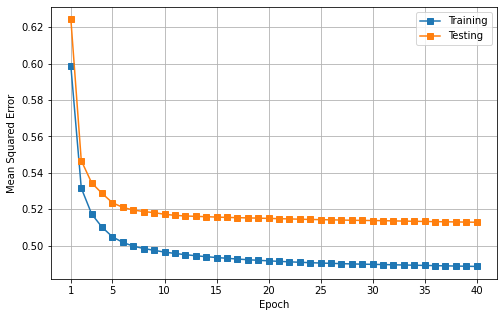

Epoch 31. Training MSE: 0.438, Test MSE: 0.491.
Epoch 32. Training MSE: 0.438, Test MSE: 0.491.
Epoch 33. Training MSE: 0.437, Test MSE: 0.491.
Epoch 34. Training MSE: 0.437, Test MSE: 0.491.
Epoch 35. Training MSE: 0.437, Test MSE: 0.491.
Epoch 36. Training MSE: 0.437, Test MSE: 0.491.
Epoch 37. Training MSE: 0.437, Test MSE: 0.491.
Epoch 38. Training MSE: 0.436, Test MSE: 0.491.
Epoch 39. Training MSE: 0.436, Test MSE: 0.491.
Epoch 40. Training MSE: 0.436, Test MSE: 0.491.
Calculation time for 200 particles: 14.200754070281983 minutes.


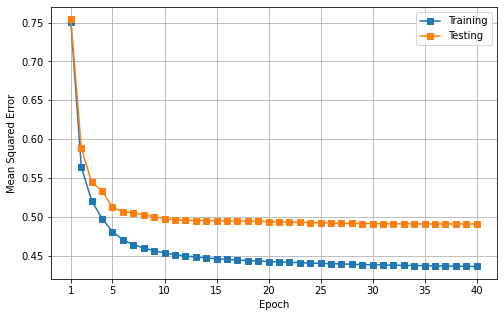

Epoch 31. Training MSE: 0.418, Test MSE: 0.476.
Epoch 32. Training MSE: 0.417, Test MSE: 0.476.
Epoch 33. Training MSE: 0.417, Test MSE: 0.476.
Epoch 34. Training MSE: 0.416, Test MSE: 0.476.
Epoch 35. Training MSE: 0.416, Test MSE: 0.476.
Epoch 36. Training MSE: 0.416, Test MSE: 0.476.
Epoch 37. Training MSE: 0.415, Test MSE: 0.476.
Epoch 38. Training MSE: 0.415, Test MSE: 0.476.
Epoch 39. Training MSE: 0.415, Test MSE: 0.476.
Epoch 40. Training MSE: 0.415, Test MSE: 0.476.
Calculation time for 300 particles: 22.74589295387268 minutes.


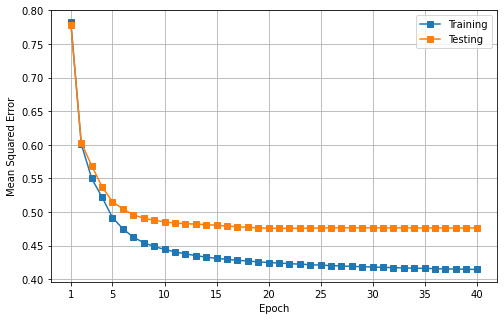

Epoch 31. Training MSE: 0.397, Test MSE: 0.472.
Epoch 32. Training MSE: 0.397, Test MSE: 0.472.
Epoch 33. Training MSE: 0.396, Test MSE: 0.472.
Epoch 34. Training MSE: 0.396, Test MSE: 0.472.
Epoch 35. Training MSE: 0.395, Test MSE: 0.472.
Epoch 36. Training MSE: 0.395, Test MSE: 0.472.
Epoch 37. Training MSE: 0.394, Test MSE: 0.473.
Epoch 38. Training MSE: 0.394, Test MSE: 0.473.
Epoch 39. Training MSE: 0.393, Test MSE: 0.473.
Epoch 40. Training MSE: 0.393, Test MSE: 0.473.
Calculation time for 400 particles: 31.482252621650694 minutes.


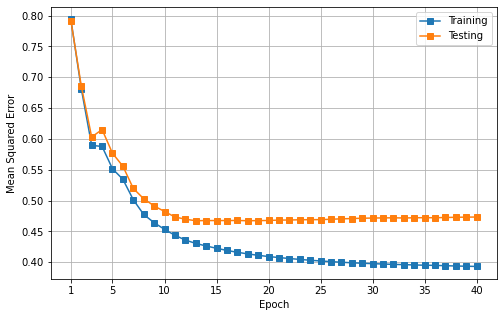

Epoch 31. Training MSE: 0.383, Test MSE: 0.468.
Epoch 32. Training MSE: 0.383, Test MSE: 0.469.
Epoch 33. Training MSE: 0.382, Test MSE: 0.469.
Epoch 34. Training MSE: 0.381, Test MSE: 0.469.
Epoch 35. Training MSE: 0.38, Test MSE: 0.47.
Epoch 36. Training MSE: 0.38, Test MSE: 0.469.
Epoch 37. Training MSE: 0.379, Test MSE: 0.469.
Epoch 38. Training MSE: 0.378, Test MSE: 0.47.
Epoch 39. Training MSE: 0.378, Test MSE: 0.47.
Epoch 40. Training MSE: 0.377, Test MSE: 0.47.
Calculation time for 500 particles: 40.719056737422946 minutes.


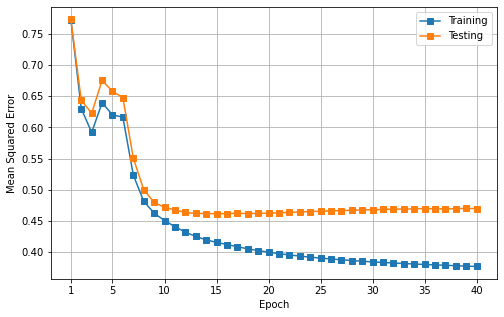

Epoch 31. Training MSE: 0.379, Test MSE: 0.495.
Epoch 32. Training MSE: 0.378, Test MSE: 0.496.
Epoch 33. Training MSE: 0.377, Test MSE: 0.496.
Epoch 34. Training MSE: 0.375, Test MSE: 0.497.
Epoch 35. Training MSE: 0.374, Test MSE: 0.497.
Epoch 36. Training MSE: 0.373, Test MSE: 0.497.
Epoch 37. Training MSE: 0.373, Test MSE: 0.497.
Epoch 38. Training MSE: 0.372, Test MSE: 0.498.
Epoch 39. Training MSE: 0.371, Test MSE: 0.498.
Epoch 40. Training MSE: 0.37, Test MSE: 0.497.
Calculation time for 600 particles: 45.78664028247197 minutes.


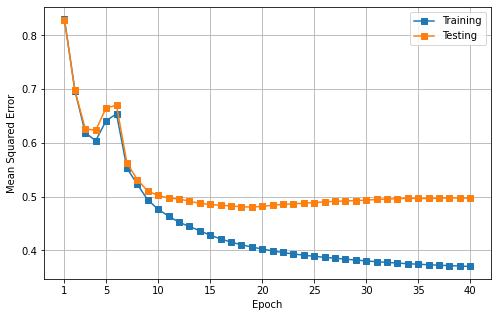

Epoch 31. Training MSE: 0.36, Test MSE: 0.469.
Epoch 32. Training MSE: 0.359, Test MSE: 0.469.
Epoch 33. Training MSE: 0.357, Test MSE: 0.469.
Epoch 34. Training MSE: 0.356, Test MSE: 0.469.
Epoch 35. Training MSE: 0.354, Test MSE: 0.469.
Epoch 36. Training MSE: 0.353, Test MSE: 0.469.
Epoch 37. Training MSE: 0.352, Test MSE: 0.469.
Epoch 38. Training MSE: 0.351, Test MSE: 0.47.
Epoch 39. Training MSE: 0.35, Test MSE: 0.47.
Epoch 40. Training MSE: 0.349, Test MSE: 0.47.
Calculation time for 700 particles: 54.12793683608373 minutes.


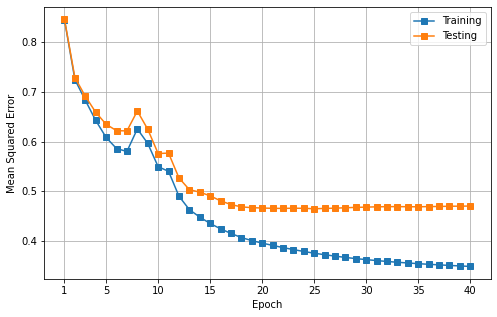

Epoch 31. Training MSE: 0.364, Test MSE: 0.477.
Epoch 32. Training MSE: 0.362, Test MSE: 0.477.
Epoch 33. Training MSE: 0.36, Test MSE: 0.478.
Epoch 34. Training MSE: 0.358, Test MSE: 0.479.
Epoch 35. Training MSE: 0.357, Test MSE: 0.48.
Epoch 36. Training MSE: 0.355, Test MSE: 0.48.
Epoch 37. Training MSE: 0.354, Test MSE: 0.48.
Epoch 38. Training MSE: 0.352, Test MSE: 0.48.
Epoch 39. Training MSE: 0.351, Test MSE: 0.481.
Epoch 40. Training MSE: 0.349, Test MSE: 0.481.
Calculation time for 800 particles: 62.822071834405264 minutes.


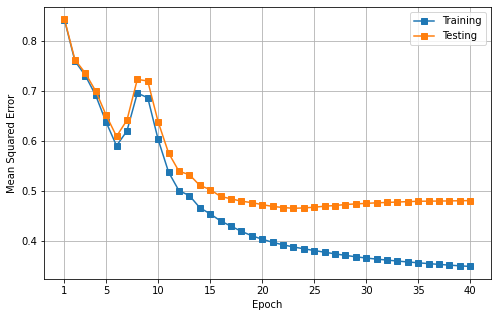

Epoch 31. Training MSE: 0.354, Test MSE: 0.48.
Epoch 32. Training MSE: 0.352, Test MSE: 0.48.
Epoch 33. Training MSE: 0.349, Test MSE: 0.481.
Epoch 34. Training MSE: 0.346, Test MSE: 0.481.
Epoch 35. Training MSE: 0.344, Test MSE: 0.482.
Epoch 36. Training MSE: 0.341, Test MSE: 0.483.
Epoch 37. Training MSE: 0.339, Test MSE: 0.483.
Epoch 38. Training MSE: 0.337, Test MSE: 0.483.
Epoch 39. Training MSE: 0.335, Test MSE: 0.484.
Epoch 40. Training MSE: 0.334, Test MSE: 0.485.
Calculation time for 900 particles: 71.59407808383305 minutes.


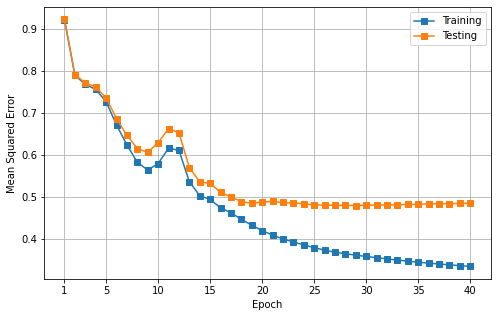

Epoch 31. Training MSE: 0.358, Test MSE: 0.456.
Epoch 32. Training MSE: 0.354, Test MSE: 0.454.
Epoch 33. Training MSE: 0.35, Test MSE: 0.454.
Epoch 34. Training MSE: 0.347, Test MSE: 0.452.
Epoch 35. Training MSE: 0.344, Test MSE: 0.451.
Epoch 36. Training MSE: 0.341, Test MSE: 0.45.
Epoch 37. Training MSE: 0.339, Test MSE: 0.449.
Epoch 38. Training MSE: 0.337, Test MSE: 0.448.
Epoch 39. Training MSE: 0.334, Test MSE: 0.448.
Epoch 40. Training MSE: 0.332, Test MSE: 0.448.
Calculation time for 1000 particles: 80.28027424414952 minutes.


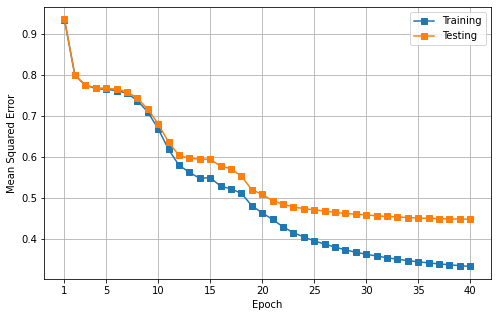

Epoch 31. Training MSE: 0.474, Test MSE: 0.509.
Epoch 32. Training MSE: 0.459, Test MSE: 0.501.
Epoch 33. Training MSE: 0.441, Test MSE: 0.496.
Epoch 34. Training MSE: 0.425, Test MSE: 0.486.
Epoch 35. Training MSE: 0.41, Test MSE: 0.481.
Epoch 36. Training MSE: 0.4, Test MSE: 0.476.
Epoch 37. Training MSE: 0.391, Test MSE: 0.475.
Epoch 38. Training MSE: 0.383, Test MSE: 0.472.
Epoch 39. Training MSE: 0.374, Test MSE: 0.471.
Epoch 40. Training MSE: 0.366, Test MSE: 0.467.
Calculation time for 1500 particles: 128.7899230281512 minutes.


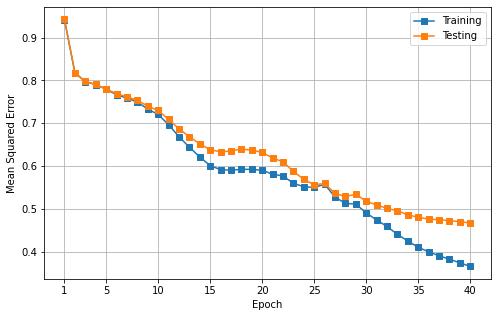

Epoch 31. Training MSE: 0.604, Test MSE: 0.637.
Epoch 32. Training MSE: 0.584, Test MSE: 0.618.
Epoch 33. Training MSE: 0.549, Test MSE: 0.585.
Epoch 34. Training MSE: 0.526, Test MSE: 0.566.
Epoch 35. Training MSE: 0.517, Test MSE: 0.564.
Epoch 36. Training MSE: 0.484, Test MSE: 0.529.
Epoch 37. Training MSE: 0.472, Test MSE: 0.518.
Epoch 38. Training MSE: 0.456, Test MSE: 0.497.
Epoch 39. Training MSE: 0.437, Test MSE: 0.48.
Epoch 40. Training MSE: 0.425, Test MSE: 0.47.
Calculation time for 2000 particles: 184.18798473278682 minutes.


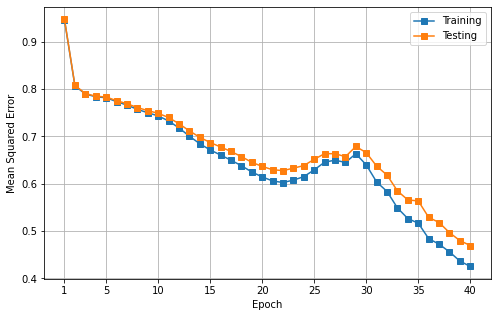

In [8]:
for p in particle_list:
    setting_dict["particles"] = p
    
    import random
    import os
    import numpy as np
    import tensorflow as tf

    os.environ['PYTHONHASHSEED'] = '0'
    np.random.seed(42)
    random.seed(42)
    session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads = 1, inter_op_parallelism_threads = 1)
    tf.compat.v1.set_random_seed(42)
    sess = tf.compat.v1.Session(graph = tf.compat.v1.get_default_graph(), config = session_conf)
    tf.compat.v1.keras.backend.set_session(sess)

    start_time = time.time()
    mean_model, mean_model_train_mse, mean_model_test_mse = enkf_regressor_extension(extend_model = "../models/wine/enkf_wine_full_E{}_B{}_P{}_H{}.h5".format(setting_dict["epochs"], setting_dict["batch_size"], p, setting_dict["h_0"]),
                                                                                     additional_epochs = additional_epochs,
                                                                                     save_all = True,
                                                                                     verbose = 1)
    end_time = time.time()
    print("Calculation time for {} particles: {} minutes.".format(p, (end_time - start_time) / 60))
    nn_plot_epoch_mse(mean_model_train_mse,
                      mean_model_test_mse,
                      mse_mean = None,
                      savefig = True,
                      file = "../img/wine/enkf_wine_full_E{}_B{}_P{}_H{}.png".format(setting_dict["epochs"]+additional_epochs, setting_dict["batch_size"], p, setting_dict["h_0"]))